In [2]:
''' Loading Saved Dataset'''
from joblib import dump, load

df = load('training_data_regression.joblib')

In [3]:
import numpy as np
''' Adding NaN values (missing values) to features '''
df.loc[df['album_release_day'] == 0,'album_release_day'] = np.nan
df.loc[df['album_release_month'] == 0,'album_release_month'] = np.nan

df.loc[df['lyric_sentiment_positive'] == -1,'lyric_sentiment_positive'] = np.nan
df.loc[df['lyric_sentiment_neutral'] == -1,'lyric_sentiment_neutral'] = np.nan
df.loc[df['lyric_sentiment_negative'] == -1,'lyric_sentiment_negative'] = np.nan

df.loc[df['tweets_positive'] == -1,'tweets_positive'] = np.nan
df.loc[df['tweets_neutral'] == -1,'tweets_neutral'] = np.nan
df.loc[df['tweets_negative'] == -1,'tweets_negative'] = np.nan


In [4]:
''' Resolving missing values for artists '''
cols_pop = []
cols_foll = []

for column in df.loc[:, df.columns.str.startswith('artist')].columns:
    if column.endswith('popularity'):
        cols_pop.append(column)
    elif column.endswith('followers'):
        cols_foll.append(column)

df[cols_pop] = df[cols_pop].apply(lambda x: x.fillna(df[cols_pop].mean(axis=1)))
df[cols_foll] = df[cols_foll].apply(lambda x: x.fillna(df[cols_foll].mean(axis=1)))

df[cols_pop].head()

,artist_0_popularity,artist_10_popularity,artist_11_popularity,artist_12_popularity,artist_13_popularity,artist_14_popularity,artist_15_popularity,artist_16_popularity,artist_17_popularity,artist_18_popularity,...,artist_37_popularity,artist_38_popularity,artist_39_popularity,artist_3_popularity,artist_4_popularity,artist_5_popularity,artist_6_popularity,artist_7_popularity,artist_8_popularity,artist_9_popularity
0,65.0,65.0,65.0,65.0,65.0,65.0,65.0,65.0,65.0,65.0,...,65.0,65.0,65.0,65.0,65.0,65.0,65.0,65.0,65.0,65.0
1,63.0,63.0,63.0,63.0,63.0,63.0,63.0,63.0,63.0,63.0,...,63.0,63.0,63.0,63.0,63.0,63.0,63.0,63.0,63.0,63.0
2,64.0,64.0,64.0,64.0,64.0,64.0,64.0,64.0,64.0,64.0,...,64.0,64.0,64.0,64.0,64.0,64.0,64.0,64.0,64.0,64.0
3,76.0,76.0,76.0,76.0,76.0,76.0,76.0,76.0,76.0,76.0,...,76.0,76.0,76.0,76.0,76.0,76.0,76.0,76.0,76.0,76.0
4,60.0,60.0,60.0,60.0,60.0,60.0,60.0,60.0,60.0,60.0,...,60.0,60.0,60.0,60.0,60.0,60.0,60.0,60.0,60.0,60.0


In [5]:
''' Removing all records with 0 popularity '''
import pandas as pd
from sklearn.model_selection import train_test_split
import lightgbm as lgb


df = df[df.popularity != 0]

In [6]:
''' Converting topics to integer values '''

from sklearn.preprocessing import LabelEncoder
from collections import defaultdict
d = defaultdict(LabelEncoder)

#le = LabelEncoder()
topics = df['lyric_topics'].apply(pd.Series)
topics = topics.rename(columns = lambda x : 'topic_' + str(x))

for col in topics:
    topics[col] = topics[col].astype('category')
#le.fit_transform([topics[0].values])
'''
Converting back to string
fit.apply(lambda x: d[x.name].inverse_transform(x))
'''
fit = topics.apply(lambda x: d[x.name].fit_transform(x.astype(str)))
df = pd.concat([df, fit], axis=1)
df.drop('lyric_topics', axis=1, inplace=True)

''' Setting correct nan values '''
df.loc[df['topic_0'] == 0,'topic_0'] = -1
df.loc[df['topic_1'] == 0,'topic_1'] = -1
df.loc[df['topic_2'] == 0,'topic_2'] = -1
df.loc[df['topic_3'] == 0,'topic_3'] = -1
df.loc[df['topic_4'] == 0,'topic_4'] = -1
fit

,topic_0,topic_1,topic_2,topic_3,topic_4
0,2619,2610,2555,2634,2639
1,2109,4085,3419,4524,4300
2,3304,3771,4392,302,1008
3,2882,1752,397,1724,2120
4,2190,3239,2009,2094,1749
5,817,4085,3226,2390,2120
6,2242,4027,1662,1300,4072
7,911,1586,2493,1535,411
8,4282,3356,2404,852,3970
9,2619,2610,2555,2634,2639


In [7]:
''' Adding fade-out length '''
df['fade_out_length'] = df['duration_ms'] / 1000 - df['start_of_fade_out']

df['fade_out_length'].head()

0    11.31407
1    14.64454
2     6.55519
3    12.29296
4     8.61684
Name: fade_out_length, dtype: float64

In [7]:
''' Creating training and test datasets and labels '''

X = df.drop("popularity", axis=1)
y = df["popularity"].copy()

#from sklearn.preprocessing import StandardScaler
#sc = StandardScaler()
#X_transformed = sc.fit_transform(X_pre)
#X = pd.DataFrame(X_transformed, columns=X_pre.columns)

xTrain, xTest, yTrain, yTest = train_test_split(X, y, test_size = 1/3, random_state = 0)

df.describe()

,acousticness,album_popularity,album_release_day,album_release_month,album_total_tracks,artist_0_popularity,artist_0_total_followers,artist_10_popularity,artist_10_total_followers,artist_11_popularity,...,tweets_negative,tweets_neutral,tweets_positive,valence,topic_0,topic_1,topic_2,topic_3,topic_4,fade_out_length
count,49088.000000,20742.000000,17167.000000,17179.000000,20742.000000,36189.000000,3.618900e+04,36189.000000,3.618900e+04,36189.000000,...,7039.000000,7039.000000,7039.000000,49088.000000,49088.000000,49088.000000,49088.000000,49088.000000,49088.000000,49082.000000
mean,0.273437,39.369010,15.361566,6.426858,17.540160,55.492249,9.417609e+05,55.450740,9.393236e+05,55.450753,...,0.021788,0.392272,0.040408,0.473998,2534.735312,2512.398061,2465.927049,2620.015095,2612.232216,8.498762
std,0.330210,16.882906,9.264979,3.350840,14.344229,17.282204,2.922656e+06,17.003416,2.820494e+06,17.004951,...,0.066486,0.439862,0.087855,0.268143,852.302414,857.799717,871.232805,903.908100,886.157866,6.369827
min,0.000000,0.000000,1.000000,1.000000,1.000000,0.000000,0.000000e+00,0.000000,0.000000e+00,0.000000,...,0.000000,0.000000,0.000000,0.000000,-1.000000,-1.000000,-1.000000,-1.000000,-1.000000,-159.003430
25%,0.005590,27.000000,7.000000,3.000000,11.000000,45.000000,2.798800e+04,45.000000,3.159200e+04,45.000000,...,0.000000,0.000000,0.000000,0.246000,2619.000000,2479.000000,2555.000000,2634.000000,2639.000000,4.629157
50%,0.100000,39.000000,15.000000,6.000000,13.500000,56.000000,1.351250e+05,56.000000,1.405320e+05,56.000000,...,0.000000,0.000000,0.000000,0.466000,2619.000000,2610.000000,2555.000000,2634.000000,2639.000000,7.471780
75%,0.498000,52.000000,24.000000,9.000000,19.000000,67.000000,5.420280e+05,67.000000,5.499120e+05,67.000000,...,0.000000,0.881192,0.034217,0.695000,2619.000000,2610.000000,2555.000000,2634.000000,2639.000000,11.157435
max,0.996000,90.000000,31.000000,12.000000,244.000000,99.000000,4.587180e+07,99.000000,4.587180e+07,99.000000,...,0.643000,1.000000,0.678000,0.993000,4775.000000,4992.000000,4915.000000,5096.000000,5157.000000,189.211400


In [14]:
''' Saving datasets to disk '''

train_data = lgb.Dataset(xTrain, yTrain)
valid_data = lgb.Dataset(xTest, yTest, reference=train_data)

train_data.save_binary('train.bin')
valid_data.save_binary('valid.bin')

In [15]:
''' Training model '''
''' https://github.com/microsoft/LightGBM/blob/master/examples/python-guide/simple_example.py'''
from sklearn.metrics import mean_squared_error

import lightgbm as lgb

params = {
    'seed': 42, 
    'num_threads': 6,
    'boosting': 'gbdt',
    'tree_learner': 'serial',
    'learning_rate': 0.0125,
    'num_iterations': 874,
    'num_leaves': 124,
}

evals_result = {}

gbm = lgb.train(params,
                train_data,
                #num_boost_round=100,
                valid_sets=valid_data,
                #early_stopping_rounds=20,
                evals_result=evals_result)

print('Saving model...')
# save model to file
gbm.save_model('model.txt')

print('Starting predicting...')
# predict
yPred = gbm.predict(xTest, num_iteration=gbm.best_iteration)
# eval
print('The rmse of prediction is:', mean_squared_error(yTest, yPred) ** 0.5)
evals_result

Saving model...
Starting predicting...
The rmse of prediction is: 10.712580980176911


{}

In [18]:
''' Preparing SHAP '''

import shap

%time shap_values = shap.TreeExplainer(gbm).shap_values(xTest)
%time explainer = shap.TreeExplainer(gbm)

Wall time: 3min 22s
Wall time: 2.58 s


In [19]:
shap.initjs()
print('Exact value', yTest.iloc[3])
shap.force_plot(explainer.expected_value, shap_values[3,:], xTest.iloc[3,:])

Exact value 41


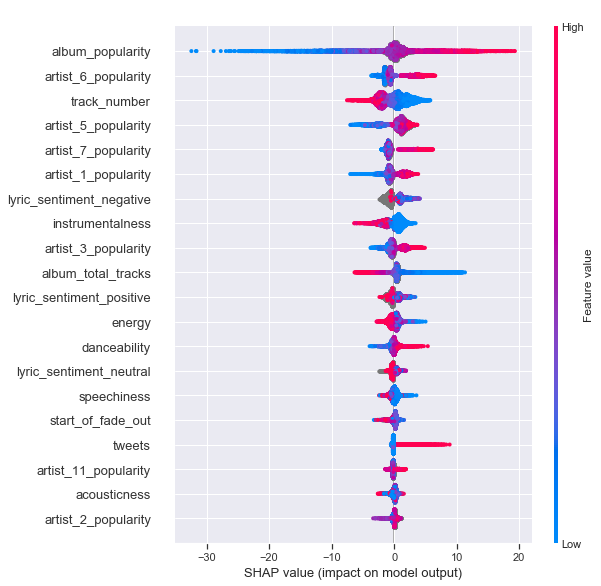

Fig 1


In [20]:
shap.summary_plot(shap_values, xTest, title=123)
print("Fig 1")

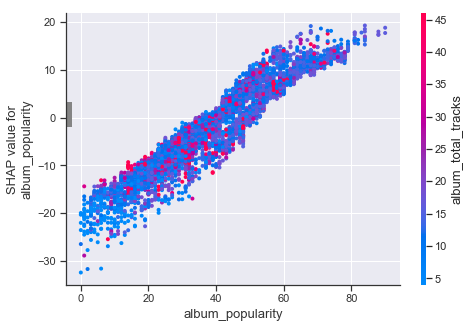

In [21]:
shap.dependence_plot("album_popularity", shap_values, xTest)

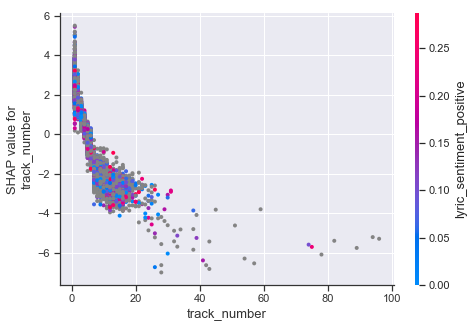

In [22]:
shap.dependence_plot("track_number", shap_values, xTest)

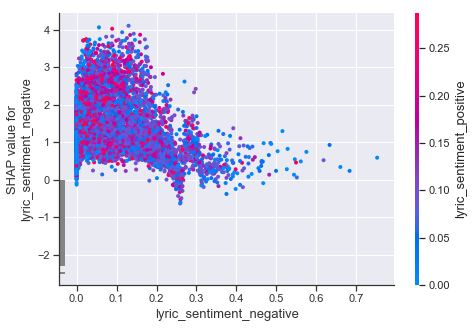

In [23]:
shap.dependence_plot("lyric_sentiment_negative", shap_values, xTest)

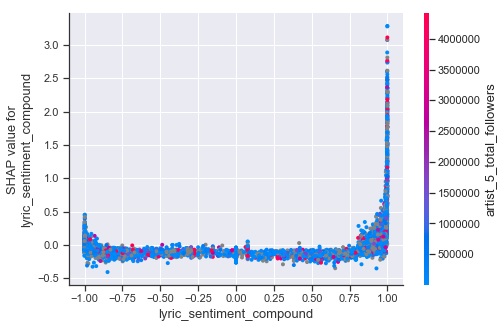

In [24]:
shap.dependence_plot("lyric_sentiment_compound", shap_values, xTest)

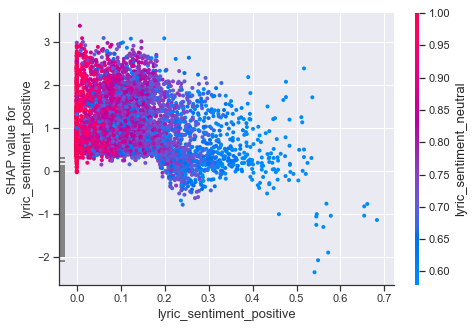

In [25]:
shap.dependence_plot("lyric_sentiment_positive", shap_values, xTest)

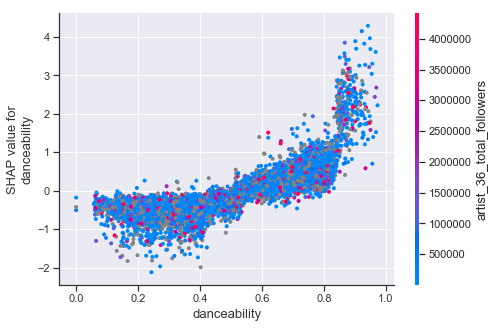

In [26]:
shap.dependence_plot("danceability", shap_values, xTest)

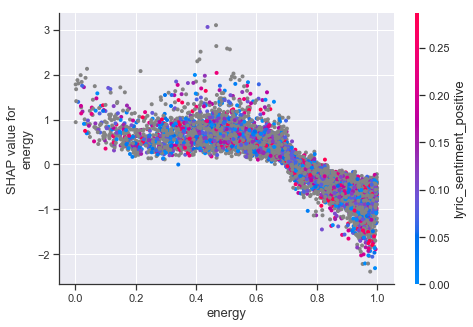

In [32]:
shap.dependence_plot("energy", shap_values, xTest, interaction_index="lyric_sentiment_positive")

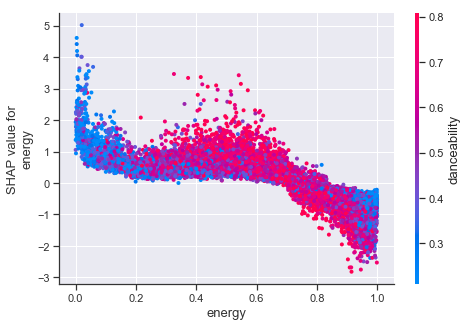

In [28]:
shap.dependence_plot("energy", shap_values, xTest, interaction_index="danceability")

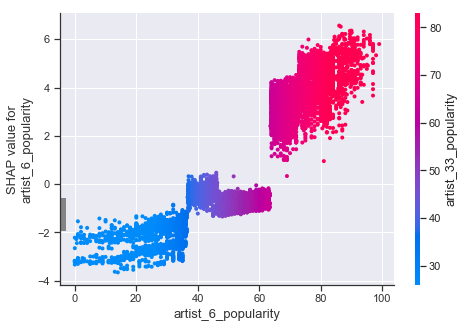

In [33]:
shap.dependence_plot("artist_6_popularity", shap_values, xTest)